In [34]:
#importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC                           
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
%matplotlib inline

In [35]:
#reading the file
df = pd.read_csv('titanic_data.csv')

In [36]:
#exploring the data
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [38]:
#assigning average age per gender for the missing values
df.loc[(df['sex']=='male') & (df['age'].isna() == 1), 'age'] = df.loc[(df['sex']=='male') & (df['age'].isna() == 0), 'age'].mean()
df.loc[(df['sex']=='female') & (df['age'].isna() == 1), 'age'] = df.loc[(df['sex']=='female') & (df['age'].isna() == 0), 'age'].mean()

In [42]:
#dropping the missing values rows for fare and embarked as it's only few rows
df = df.loc[(df['fare'].notna() == 1)] 
df = df.loc[(df['embarked'].notna() == 1)] 

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1306 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1306 non-null   float64
 1   survived   1306 non-null   float64
 2   name       1306 non-null   object 
 3   sex        1306 non-null   object 
 4   age        1306 non-null   float64
 5   sibsp      1306 non-null   float64
 6   parch      1306 non-null   float64
 7   ticket     1306 non-null   object 
 8   fare       1306 non-null   float64
 9   cabin      293 non-null    object 
 10  embarked   1306 non-null   object 
 11  boat       484 non-null    object 
 12  body       120 non-null    float64
 13  home.dest  744 non-null    object 
dtypes: float64(7), object(7)
memory usage: 153.0+ KB


In [79]:
# create new copy of the dataframe and keep only the full columns
df2 = df.drop(['boat','body','home.dest','cabin','name','ticket'], axis=1)
df2.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


In [80]:
df2.describe()

,pclass,survived,age,sibsp,parch,fare
count,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000
mean,2.296325,0.381317,29.855303,0.50000,0.385911,33.223956
std,0.837037,0.485896,12.843433,1.04258,0.866357,51.765986
min,1.000000,0.000000,0.166700,0.00000,0.000000,0.000000
25%,2.000000,0.000000,22.000000,0.00000,0.000000,7.895800
50%,3.000000,0.000000,30.000000,0.00000,0.000000,14.454200
75%,3.000000,1.000000,35.000000,1.00000,0.000000,31.275000
max,3.000000,1.000000,80.000000,8.00000,9.000000,512.329200


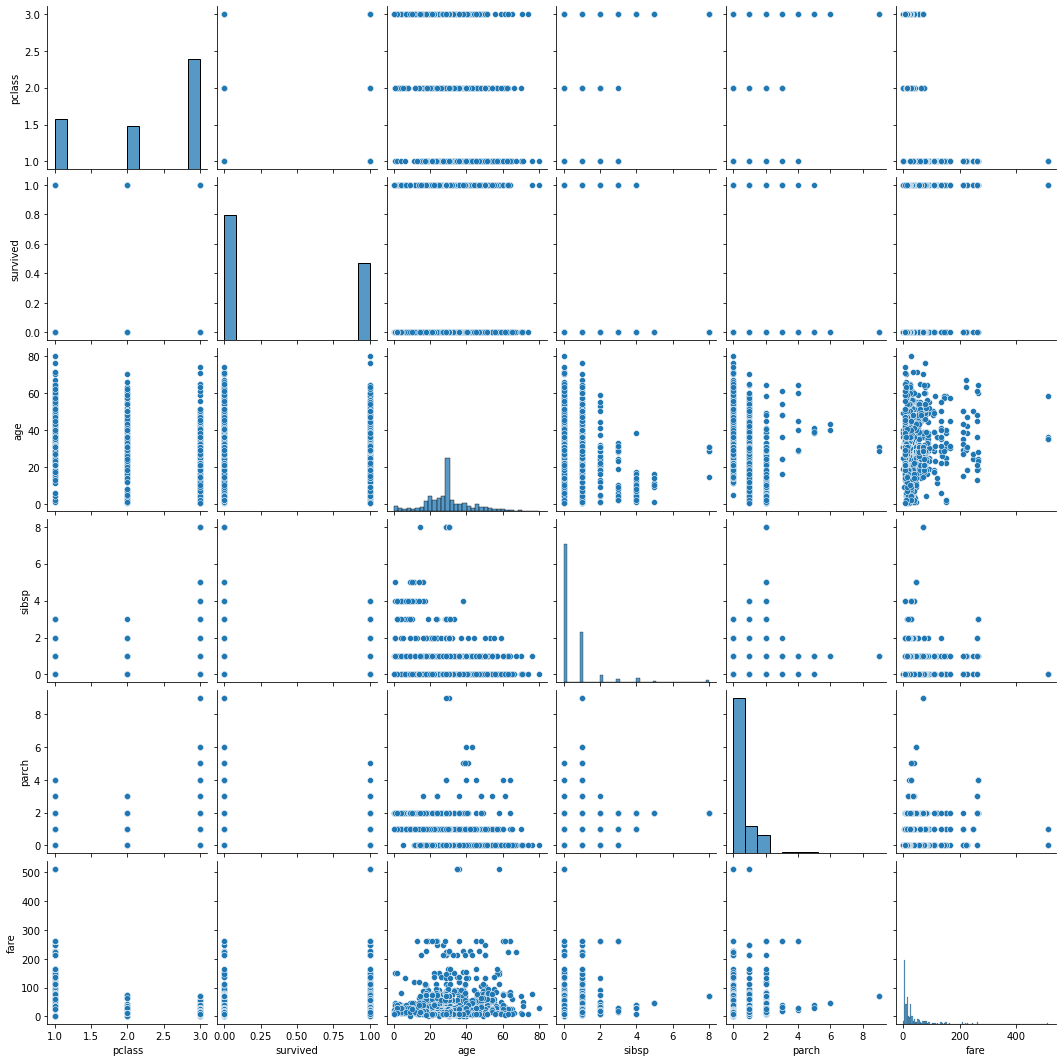

In [81]:
#descriptive analysis
sns.pairplot(df2)

<AxesSubplot:>

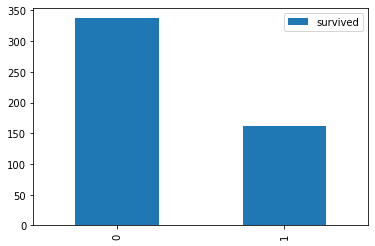

In [82]:
#female had survived more than male. It has strong impact on the predictions
plot_data = df2.groupby('sex')[['survived']].sum().reset_index()
plot_data.plot(kind='bar')

<AxesSubplot:xlabel='age', ylabel='survived'>

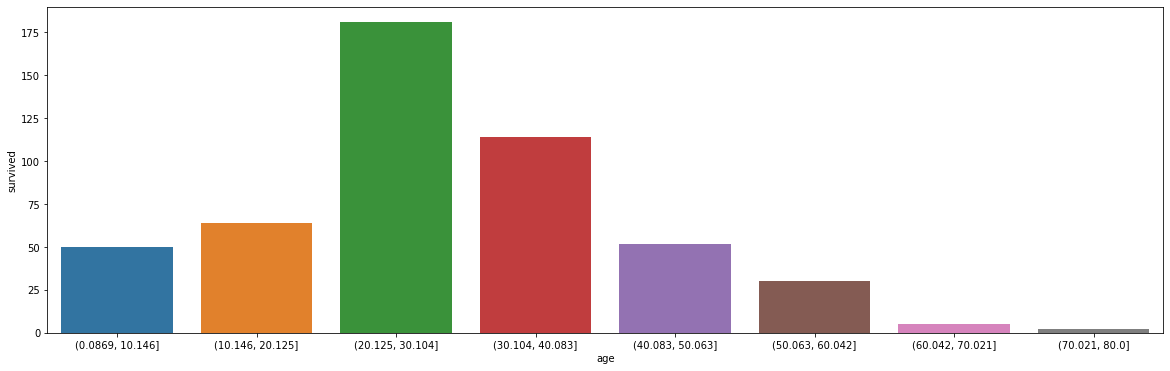

In [83]:
#age has a great impact on the survival score. Majority from 20 to 30 years old
plot_data = (df2[['age','survived']]
 .groupby(pd.cut(df2['age'], bins=8,right=True)) 
 ['survived'].sum()
 .reset_index()
)
plt.figure(figsize=(20,6))
sns.barplot(x=plot_data['age'], y=plot_data['survived'], data=plot_data)

In [84]:
df2.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


In [85]:
# creating dummies for the categorical columns
d_pclass = pd.get_dummies(df2['pclass'], drop_first=True)
d_sex = pd.get_dummies(df2['sex'], drop_first=True)
d_sibsp = pd.get_dummies(df2['sibsp'], drop_first=True)
d_parch = pd.get_dummies(df2['parch'], drop_first=True)
d_embarked = pd.get_dummies(df2['embarked'], drop_first=True)

In [86]:
#combine the dumies with original dataframe
df3 = pd.concat([df2,d_pclass,d_sex,d_sibsp,d_parch,d_embarked],axis=1)
df3.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked,2.0,3.0,...,8.0,1.0,2.0,3.0,4.0,5.0,6.0,9.0,Q,S
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S,0,0,...,0,0,1,0,0,0,0,0,0,1
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S,0,0,...,0,0,1,0,0,0,0,0,0,1
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S,0,0,...,0,0,1,0,0,0,0,0,0,1


In [90]:
X = df3.drop(['pclass','survived','sex','sibsp','parch','embarked'],axis=1)
y = df3['survived']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=101)

In [95]:
#will try to run different models of ML to get the best resaults
rfc = RandomForestClassifier(n_estimators=100)

In [96]:
rfc.fit(X_train, y_train)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


RandomForestClassifier()

In [97]:
rfc_pred = rfc.predict(X_test)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [98]:
print(metrics.confusion_matrix(y_test,rfc_pred))

[[287  49]
 [ 54 133]]


In [99]:
dtree = DecisionTreeClassifier()

In [100]:
dtree.fit(X_train,y_train)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


DecisionTreeClassifier()

In [101]:
dtree_pred = dtree.predict(X_test)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [104]:
print(metrics.confusion_matrix(y_test,dtree_pred))

[[277  59]
 [ 56 131]]


In [105]:
knn = KNeighborsClassifier(n_neighbors=1)

In [106]:
knn.fit(X_train,y_train)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier(n_neighbors=1)

In [107]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))    

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\U

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\U

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\U

Text(0, 0.5, 'Error Rate')

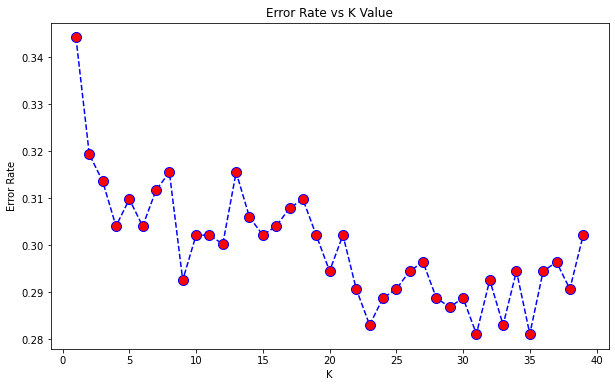

In [108]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate, color= 'blue', linestyle='dashed', marker = 'o',
        markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [109]:
knn = KNeighborsClassifier(n_neighbors=31)

In [110]:
knn.fit(X_train,y_train)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


KNeighborsClassifier(n_neighbors=31)

In [111]:
knn_pred = knn.predict(X_test)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [112]:
print(metrics.confusion_matrix(y_test,knn_pred))

[[284  52]
 [ 95  92]]


In [113]:
log= LogisticRegression()

In [115]:
log.fit(x_train, y_train)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [116]:
log_pred = log.predict(x_test)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [117]:
# the best resault is for Log regression which will be used
print(metrics.confusion_matrix(y_test,log_pred))

[[286  50]
 [ 42 145]]


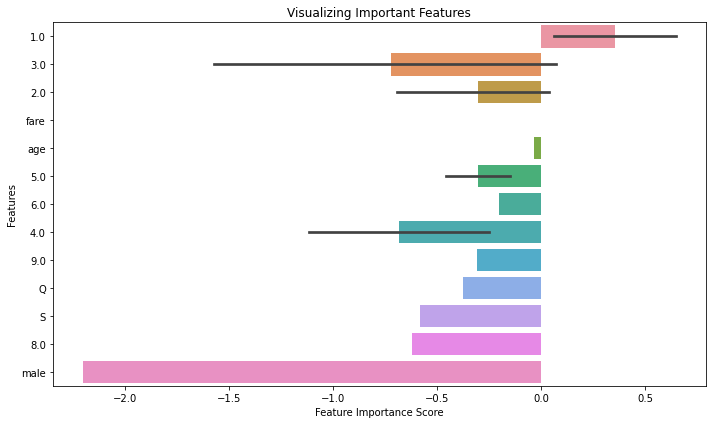

In [123]:
#trying to improve it further by scalling the importance of each feature
feature_imp = pd.Series(log.coef_[0], index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.tight_layout()

In [125]:
# try to run the model without fare column
X = df3.drop(['pclass','survived','sex','sibsp','parch','embarked','fare'],axis=1)
y = df3['survived']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.40, random_state=101)

In [127]:
log2= LogisticRegression()

In [128]:
log2.fit(x_train, y_train)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [129]:
log_pred2 = log2.predict(x_test)

C:\Users\mina.aziz\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['float', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [131]:
# we are getting the same resault
print(metrics.confusion_matrix(y_test,log_pred2))

[[286  50]
 [ 42 145]]


In [133]:
print(metrics.classification_report(y_test,log_pred2))

              precision    recall  f1-score   support

         0.0       0.87      0.85      0.86       336
         1.0       0.74      0.78      0.76       187

    accuracy                           0.82       523
   macro avg       0.81      0.81      0.81       523
weighted avg       0.83      0.82      0.82       523

